##Παρατηρήσεις
1. Φαίνεται από μια πρόχειρη ανάλυση των ταμειακών υπολοίπων των εσόδων, ότι οι Σέρρες παρουσιάζουν ένα μόνιμο ταμεικό υπόλοιπο που είναι από 7.000.000(2012) εως 5.000.000(2014) 

Το συγκεκριμένο notebook είναι για να συγκρίνουμε τα στοιχεία των προϋπολογισμών ως προς τον προϋπολογισμό και τις αναμορφώσεις προκειμένου να δούμε το κατά πόσο μπόρεσε να επιτύχει με βάση τα νούμερα καλύτερα αποτελέσματα και εάν αυτό βελτιώνεται με την πάροδο του χρόνου και την απόκτηση περισσότερης εμπειρίας. 
Ο χρόνος εκκίνησης είναι το 2012.

Στόχος είναι να μελετήσουμε τα δεδομένα σε δύο επίπεδα:
1. Σε επίπεδο περιφέρειας
2. Σε επίπεδο περιφερειακής ενότητας

Και στα δύο επίπεδα ανάλυσης η μελέτη θα γίνει
1. Σε επίπεδο φορέα
2. Σε επίπεδο χιλιάδας ΚΑΕ
3. Σε επίπεδο εκατοντάδας ΚΑΕ

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np

#Import our custom libraries
from dataframes import DataFramesBuilder as dfb
import definitions as defs
import sigkrisi_proipologismon as sp

db = dfb()

###Αρχικοποίηση και διάβασμα των δεδομένων

Τα δεδομένα που διαβάζουμε εδώ είναι μέχρι και το 2014 γιατί δεν έχουμε στοιχεία για το 2015

In [22]:
sp.add_year_field
es12 = sp.add_year_field(db.add_extra_fields(db.read_esoda('../data/es_2012.xls')), 2012)
es13 = sp.add_year_field(db.add_extra_fields(db.read_esoda('../data/es_2013.xls')), 2013)
es14 = sp.add_year_field(db.add_extra_fields(db.read_esoda('../data/es_2014.xls')), 2014)
es15 = sp.add_year_field(db.add_extra_fields(db.read_esoda('../data/es_2015.xls')), 2015)


ex12 = sp.add_year_field(db.add_extra_fields(db.read_exoda('../data/ex_2012.xls')), 2012)
ex13 = sp.add_year_field(db.add_extra_fields(db.read_exoda('../data/ex_2013.xls')), 2013)
ex14 = sp.add_year_field(db.add_extra_fields(db.read_exoda('../data/ex_2014.xls')), 2014)
ex15 = sp.add_year_field(db.add_extra_fields(db.read_exoda('../data/ex_2015.xls')), 2015)

#Ένωση όλων των εσόδων
es = es12.append(es13.append(es14.append(es15)))
#Ένωση όλων των εξόδων
ex = ex12.append(ex13.append(ex14.append(ex15)))

#Ανάλυση σε όλη την περιφέρεια

##Ανάλυση με βάση το φορέα

###ΕΣΟΔΑ

In [23]:
#Διαβάζουμε μόνο τους φορείς από τα έσοδα
fes12 = sp.make_foreis(db.get_foreis_df(es12))
fes13 = sp.make_foreis(db.get_foreis_df(es13))
fes14 = sp.make_foreis(db.get_foreis_df(es14))
fes15 = sp.make_foreis(db.get_foreis_df(es15))

/Users/nikolaosioannou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


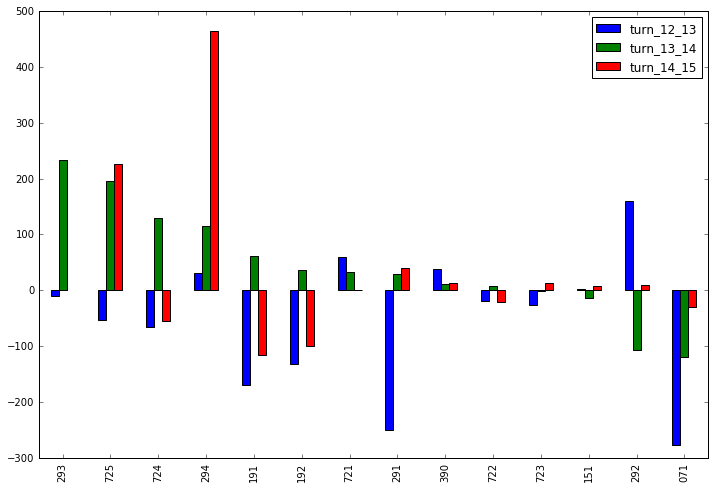

In [24]:
#Ενοποιούμε τα ποσοστά μεταβολής των τριών ετών σε ένα dataframe
fes = pd.merge(fes12,fes13,how='inner',on='foreas',suffixes=('_12','_13'))
fes = pd.merge(fes,fes14,how='inner',on='foreas')
fes = pd.merge(fes,fes15,how='inner',on='foreas',suffixes=('_14','_15'))

fes['turn_12_13'] = fes.pct_diam_13 - fes.pct_diam_12
fes['turn_13_14'] = fes.pct_diam_14 - fes.pct_diam_13
fes['turn_14_15'] = fes.pct_diam_15 - fes.pct_diam_14
sort_fes = fes.sort(['turn_13_14'], ascending=[0])
ax = sort_fes[['turn_12_13','turn_13_14','turn_14_15']].plot(kind='bar', figsize=(12,8))
a = ax.set_xticklabels(list(sort_fes['foreas']))

###ΕΞΟΔΑ

In [25]:
#Διαβάζουμε μόνο τους φορείς
fex12 = sp.make_foreis(db.get_foreis_df(ex12))
fex13 = sp.make_foreis(db.get_foreis_df(ex13))
fex14 = sp.make_foreis(db.get_foreis_df(ex14))
fex15 = sp.make_foreis(db.get_foreis_df(ex15))

/Users/nikolaosioannou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


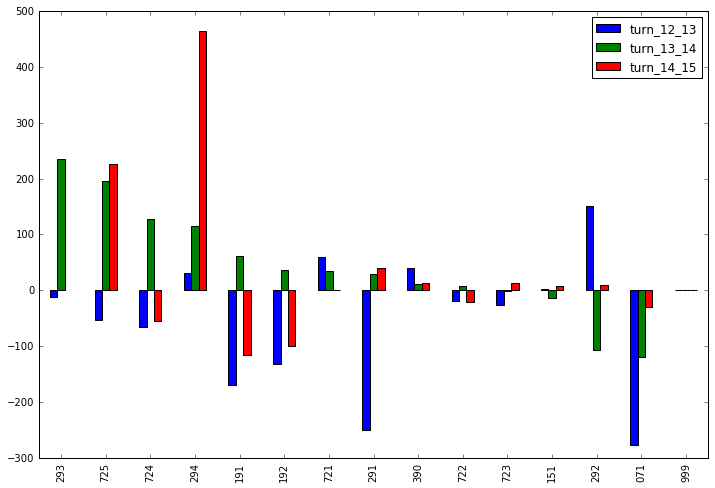

In [26]:
#Ενοποιούμε τα ποσοστά μεταβολής των τριών ετών σε ένα dataframe
fex = pd.merge(fex12,fex13,how='inner',on='foreas',suffixes=('_12','_13'))
fex = pd.merge(fex,fex14,how='inner',on='foreas')
fex = pd.merge(fex,fex15,how='inner',on='foreas',suffixes=('_14','_15'))

fex['turn_12_13'] = fex.pct_diam_13 - fex.pct_diam_12
fex['turn_13_14'] = fex.pct_diam_14 - fex.pct_diam_13
fex['turn_14_15'] = fex.pct_diam_15 - fex.pct_diam_14
sort_fex = fex.sort(['turn_13_14'], ascending=[0])
ax1 = sort_fex[['turn_12_13','turn_13_14','turn_14_15']].plot(kind='bar', figsize=(12,8))
a = ax1.set_xticklabels(list(sort_fex['foreas']))

##Ανάλυση με βάση τη χιλιάδα ΚΑΕ

##Ανάλυση με βάση την εκατοντάδα ΚΑΕ

###Επεξεργασία ταμειακών υπολοίπων

In [27]:
enot = '01'
t12 = sp.compute_tameiako_enotitas_xronia(es12,enot)
t13 = sp.compute_tameiako_enotitas_xronia(es13,enot)
t14 = sp.compute_tameiako_enotitas_xronia(es14,enot)
t15 = sp.compute_tameiako_enotitas_xronia(es15,enot)
print('2012 --> %8.2f, 2013 --> %8.2f, 2014 --> %8.2f, 2015 --> %8.2f'%(t12,t13,t14,t15))

TypeError: float argument required, not NoneType

In [29]:
t15 = sp.compute_tameiako_enotitas_xronia(es15,enot)
t15

## Q & A's

<b>Ε1.</b>Επικύρωση των αθροισμάτων των εκατοντάδων  

In [ ]:
study_year = 2012
study_enotita = None
study_xiliada = u'0'
dfes = {2012:es12, 2013:es13, 2014:es14}
dfex = {2012:ex12, 2013:ex13, 2014:ex14}
study_df = dfes[2012]
study_df = study_df[(study_df.logar.str.len()>9) & (study_df.xilia == study_xiliada)].copy()
if study_enotita != None:
    study_df = study_df[(study_df.enotita == study_enotita)]
#validation 
study_df[study_df.logar.str[11:14]=='000'].eggekrimenos.sum() - study_df[(study_df.ekato!='0') & (study_df.logar.str[12:14]=='00')].eggekrimenos.sum()

In [ ]:
df = dfes[study_year]
df = df[(df.logar.str.len()>9) & (df.logar.str[11:14]=='000')]
pvt1 = df.pivot_table(values='eggekrimenos', index='xilia', columns='enotita', aggfunc='sum')

pvt2 = df.pivot_table(values='diamorfomenos', index='xilia', columns='enotita', aggfunc='sum')

pvt_diff = pvt2 - pvt1
pvt_diff.sum(1)

In [ ]:
pvt = df.pivot_table

<b>Ε1</b>. Το άθροισμα του διαμορφωμένου που προκείπτει από τη λήψη μόνο των φορέων είναι ίδιος με αυτό που προκύπτει από τις χιλιάδες ΚΑΕ? 

In [ ]:
es_foreis = db.get_foreis_df(es)[['year','foreas','kae','diamorfomenos','logar']]
es_xilia = db.get_xilia_df(es)[['year','foreas','kae','diamorfomenos','logar']]
es_ekato = db.get_ekato_df(es)[['year','foreas','kae','diamorfomenos','logar']]
es_deka = db.get_deka_df(es)[['year','foreas','kae','diamorfomenos','logar']]

yr = 2014
grp_foreis = es_foreis[es_foreis.year == yr][['foreas','diamorfomenos']].groupby(by='foreas', as_index=False).sum()
grp_xilia = es_xilia[es_xilia.year == yr][['foreas','diamorfomenos']].groupby(by='foreas', as_index=False).sum()
grp_ekato = es_ekato[es_ekato.year == yr][['foreas','diamorfomenos']].groupby(by='foreas', as_index=False).sum()
grp_deka = es_deka[es_deka.year == yr][['foreas','diamorfomenos']].groupby(by='foreas', as_index=False).sum()

grpfx = pd.merge(grp_foreis, grp_xilia, on=['foreas'], suffixes=('_f','_x'))
grped = pd.merge(grp_ekato, grp_deka, on=['foreas'], suffixes=('_e','_d'))
grp = pd.merge(grpfx,grped,on='foreas')

grp['has_diff_xilia'] = np.ceil(grp.diamorfomenos_f) != np.ceil(grp.diamorfomenos_x)
grp['has_diff_ekato'] = np.ceil(grp.diamorfomenos_f) != np.ceil(grp.diamorfomenos_e)
grp['has_diff_deka'] = np.ceil(grp.diamorfomenos_f) != np.ceil(grp.diamorfomenos_d)
grp[grp.has_diff_xilia & grp.has_diff_ekato & grp.has_diff_deka]

In [ ]:
es_xilia[(es_xilia.foreas == '293') & (es_xilia.year == yr)]

In [ ]:
es.columns

In [ ]:
temp = es12[(es12.xilia=='1')&(es12.ekato=='2')][['foreas','kae','eggekrimenos','diamorfomenos']]
temp[temp.diamorfomenos!=0.]

In [ ]:
#Base dataframe
base = es13
t1 = base[(base.logar.str.len()>9) & (base.enotita=='01') & (base.xilia==u'9')]
#grp = t1[t1.xilia==u'0'].groupby(['enotita','xilia','ekato','deka','ena'], as_index=False).aggregate(np.sum)
grp = t1.groupby(['ekato','deka','ena'], as_index=False).aggregate(np.sum)
#Eliminate zero diamorfomenos
grp = grp[grp.diamorfomenos>0]
grp


In [ ]:
grp.ix[0,'diamorfomenos'] - (grp.ix[4,'diamorfomenos'] + grp.ix[35,'diamorfomenos'])

In [ ]:
#VALIDATE HUNDREDS
dfes[2013]

In [ ]:
temp = ex12[(ex12.enotita=='01') & (ex12.logar.str.len()==9)]
#Πάρε μόνο τους φορείς 
foreis = ex12[(ex12.logar.str.len()==9) & (ex12.diamorfomenos!=0)]
pvtforeis = foreis.pivot_table('diamorfomenos',index='foreas',columns='enotita',aggfunc='sum')
pvtforeis / 1000000

In [ ]:
pvtforeis.sum(1) / 1000000

In [ ]:
pvtforeis.div(pvtforeis.sum(1),axis=0).plot(kind='bar',stacked=True, figsize=(16,11))

#ΠΑΡΑΚΟΛΟΥΘΗΣΗ ΤΩΝ ΑΝΑΜΟΡΦΩΣΕΩΝ ΑΝΑ ΦΟΡΕΑ

In [ ]:
def get_active_foreis(df):
    return df[(df.logar.str.len()==9) & ((df.diamorfomenos!=0) | (df.eggekrimenos != 0))] 
def get_active_xilia(df):
    return df[(df.logar.str.len()>9) & ((df.diamorfomenos!=0) | (df.eggekrimenos != 0)) & (df.logar.str[11:14]=='000')]
#Έσοδα
my_fields = ['enotita','foreas','xilia','eggekrimenos','diamorfomenos','anamorfoseis']
fes12 = get_active_foreis(dfes[2012])
fes13 = get_active_foreis(dfes[2013])
fes14 = get_active_foreis(dfes[2014])
fes = pd.merge(fes12[my_fields],fes13[my_fields],on=['enotita','foreas'],suffixes=['_12','_13'],how='outer')
fes = pd.merge(fes,fes14[my_fields],on=['enotita','foreas'],how='outer')
grp1 = fes.groupby('enotita',as_index=False).sum()
grp1['pct12'] = grp1.diamorfomenos_12 / grp1.eggekrimenos_12
grp1['pct13'] = grp1.diamorfomenos_13 / grp1.eggekrimenos_13
grp1['pct14'] = grp1.diamorfomenos / grp1.eggekrimenos
grp1[['pct12','pct13','pct14']].plot(title='Synolika Pososta Anamorfoseon Esodon ana Enotita',figsize=(10,6))


#Έξοδα
fex12 = get_active_foreis(dfex[2012])
fex13 = get_active_foreis(dfex[2013])
fex14 = get_active_foreis(dfex[2014])
fex = pd.merge(fex12[my_fields],fex13[my_fields],on=['enotita','foreas'],suffixes=['_12','_13'],how='outer')
fex = pd.merge(fex,fex14[my_fields],on=['enotita','foreas'],how='outer')
grp2 = fex.groupby('enotita',as_index=False).sum()
grp2['pct12'] = grp2.diamorfomenos_12 / grp2.eggekrimenos_12
grp2['pct13'] = grp2.diamorfomenos_13 / grp2.eggekrimenos_13
grp2['pct14'] = grp2.diamorfomenos / grp2.eggekrimenos
grp2[['pct12','pct13','pct14']].plot(title='Synolika Pososta Anamorfoseon Exodon ana Enotita',figsize=(10,6))

In [ ]:
#Χρήση φορέων από περιφερειακές ενότητες σε έξοδα
fex.pivot_table('diamorfomenos', index='foreas',columns='enotita',aggfunc='count')

In [ ]:
#Χρήση φορέων από περιφερειακές ενότητες σε έσοδα
fes.pivot_table('diamorfomenos', index='foreas',columns='enotita',aggfunc='count')

In [ ]:
def create_pivot_tables(cur_year):
    ex = get_active_xilia(dfex[cur_year])[my_fields]
    p1 = ex.pivot_table('xilia',index='foreas',columns='enotita',aggfunc='count',margins=True)
    p2 = ex.pivot_table('enotita',index='foreas',columns='xilia',aggfunc='count',fill_value=0,margins=True)
    p3 = ex.pivot_table('foreas',index='enotita',columns='xilia',aggfunc='count',fill_value=0,margins=True)
    return p1, p2, p3

In [ ]:
p12_1, p12_2, p12_3 = create_pivot_tables(2012)
p13_1, p13_2, p13_3 = create_pivot_tables(2013)
p14_1, p14_2, p14_3 = create_pivot_tables(2014)

In [ ]:
print '2012\n\n', p12_1, '\n\n' , p12_2, '\n\n', p12_3

In [ ]:
print '2013\n\n', p13_1, '\n\n' , p13_2, '\n\n', p13_3

In [ ]:
print '2014\n\n', p14_1, '\n\n' , p14_2, '\n\n', p14_3

In [ ]:
print '2012 - 2013\n\n', p12_1 - p13_1, '\n\n',  p12_2 - p13_2, '\n\n',  p12_3 - p13_3

In [ ]:
print '2012 - 2014\n\n', p12_1 - p14_1, '\n\n',  p12_2 - p14_2, '\n\n',  p12_3 - p14_3

In [ ]:
print '2013 - 2014\n\n', p13_1 - p14_1, '\n\n',  p13_2 - p14_2, '\n\n',  p13_3 - p14_3

In [54]:
ex14[(ex14.foreas=='192') & ((ex14.xilia=='2'))]['diamorfomenos'].sum()

0.0

In [45]:
fdi = pd.Series(defs.foreis_dict)
fdi['071']

SyntaxError: invalid syntax (<ipython-input-45-7ea828eaebc0>, line 2)